In [1]:
dir1 = '/uscms_data/d3/mkim/MKWorkingArea/CMSSW_10_2_0/src/JL/Melrose/P2_CMSSW_10_1_5/src/L1TMuonSimulations/Analyzers/'
infile_muon = dir1 + 'test7/histos_tba.20.npz'
infile_pileup = dir1 + 'test7/histos_tbd.20.npz'

import numpy as np

loaded_m = np.load(infile_muon)

n1 = 300000

variables_m = loaded_m['variables'][:n1]

parameters_m = loaded_m['parameters'][:n1]

def ind_ptrange(parameters_m, ptmin = 2, ptmax = 200):
    ooptmin = 1./ptmax
    ooptmax = 1./ptmin
    return np.where((abs(parameters_m[:,0])>ooptmin) & (abs(parameters_m[:,0])<ooptmax))[0]

ind1 = ind_ptrange(parameters_m, ptmin = 2.000001, ptmax = 20000.)

In [ ]:
1./(parameters_m[ind1,0][:20])

In [ ]:
# skip

In [ ]:
phi_dif = []
tht_dif = []
for i in ind1:
    csc_phi = variables_m[i,0:5]
    csc_tht = variables_m[i,0+12:5+12]
    #print(np.nanmin(csc_phi))
    #print(np.nanmax(csc_phi))
    #print(np.nanmin(csc_tht))
    #print(np.nanmax(csc_tht))
    phi_dif.append(np.nanmax(csc_phi)-np.nanmin(csc_phi))
    tht_dif.append(np.nanmax(csc_tht)-np.nanmin(csc_tht))

In [ ]:
phi_dif_a = np.asarray(phi_dif)
tht_dif_a = np.asarray(tht_dif)

In [ ]:
np.mean(tht_dif_a)

In [33]:
# start here

csc_phi = variables_m[ind1,0:5]
csc_tht = variables_m[ind1,0+12:5+12]

csc_phi0 = csc_phi.reshape((csc_phi.shape[0],csc_phi.shape[1],1))
csc_tht0 = csc_tht.reshape((csc_tht.shape[0],csc_tht.shape[1],1))

y_train = parameters_m[ind1,0]

csc_phitht = np.insert(csc_tht0,[0],csc_phi0,axis=2)

xmax = 50
image = np.zeros((csc_phitht.shape[0],3,xmax+1,4))
for i in range(csc_phitht.shape[0]): #csc_phitht.shape[0]
    phi_min = np.nanmin(csc_phitht[i,:,0])
    tht_min = np.nanmin(csc_phitht[i,:,1])
    phi_max = np.nanmax(csc_phitht[i,:,0])
    tht_max = np.nanmax(csc_phitht[i,:,1])    
    #phi_offset = int((csc_phitht.shape[2]-phi_max+phi_min)/2.)
    #tht_offset = int((csc_phitht.shape[1]-tht_max+tht_min)/2.)
    for x,y in csc_phitht[i]:
        if np.isnan(x) == False and np.isnan(y) == False:
            x1, y1 = int(x-phi_min), int(y-tht_min)
            if (0 <= x1 <= xmax) and (0 <= y1 <= 2):
                image[i,y1,x1,0] += 1
            x2, y2 = int((x-phi_min)/4), int((y-tht_min)/1)
            if (0 <= x2 <= xmax) and (0 <= y2 <= 2):
                image[i,y2,x2,1] += 1
            x3, y3 = int((x-phi_min)/8), int((y-tht_min)/1)
            if (0 <= x3 <= xmax) and (0 <= y3 <= 2):
                image[i,y3,x3,2] += 1
            x4, y4 = int((x-phi_min)/8), int((y-tht_min)/2)
            if (0 <= x4 <= xmax) and (0 <= y4 <= 2):
                image[i,y4,x4,3] += 1

In [ ]:
# skip

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


In [34]:
j = 30
print(1./y_train[j])

3.5106104255019743


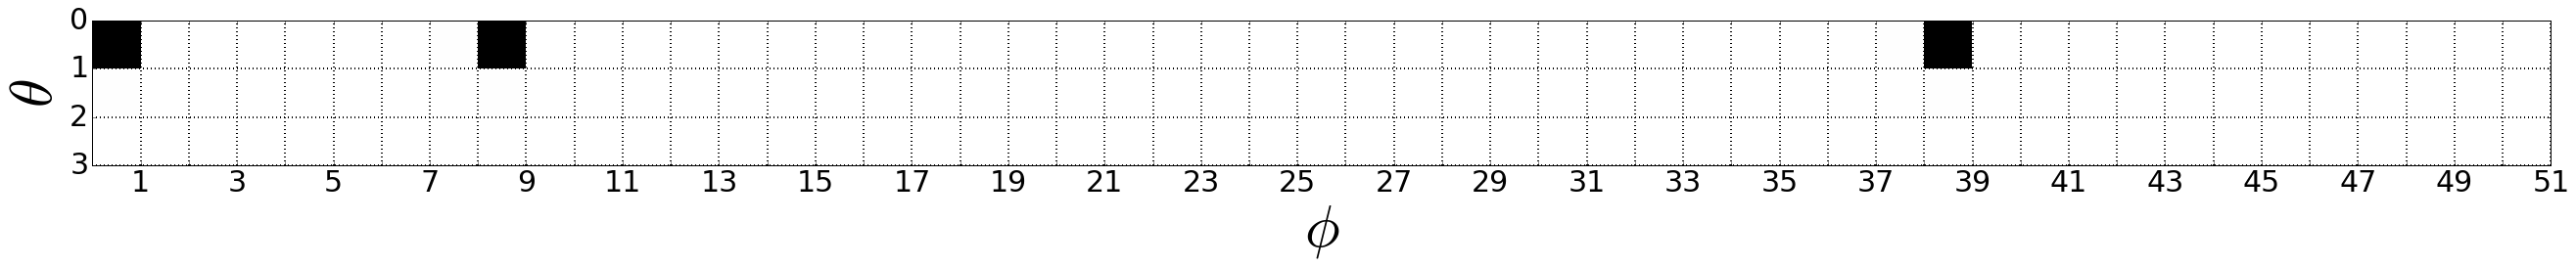

In [39]:
plt.figure(figsize=(45,500))
plt.imshow(image[j,:,:,0],cmap='Greys', interpolation='none')
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, 51, 1))
ax.set_yticks(np.arange(-0.5, 3, 1));
plt.grid(color='black', linewidth=2)
ax.set_xticklabels(np.arange(0, 52, 1), fontsize=30)
ax.set_yticklabels(np.arange(0, 4, 1), fontsize=30)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.grid(color='black', linewidth=2, which='minor')
plt.xlabel(r'$\phi$', fontsize=60)
plt.ylabel(r'$\theta$', fontsize=60)

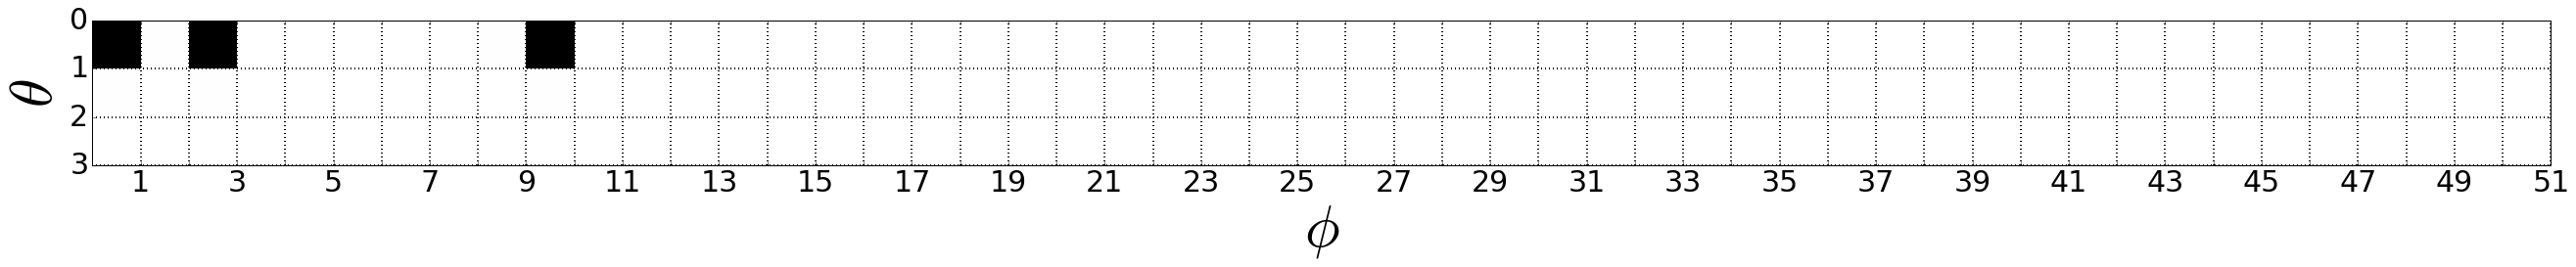

In [40]:
plt.figure(figsize=(45,500))
plt.imshow(image[j,:,:,1],cmap='Greys', interpolation='none')
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, 51, 1))
ax.set_yticks(np.arange(-0.5, 3, 1));
plt.grid(color='black', linewidth=2)
ax.set_xticklabels(np.arange(0, 52, 1), fontsize=30)
ax.set_yticklabels(np.arange(0, 4, 1), fontsize=30)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.grid(color='black', linewidth=2, which='minor')
plt.xlabel(r'$\phi$', fontsize=60)
plt.ylabel(r'$\theta$', fontsize=60)

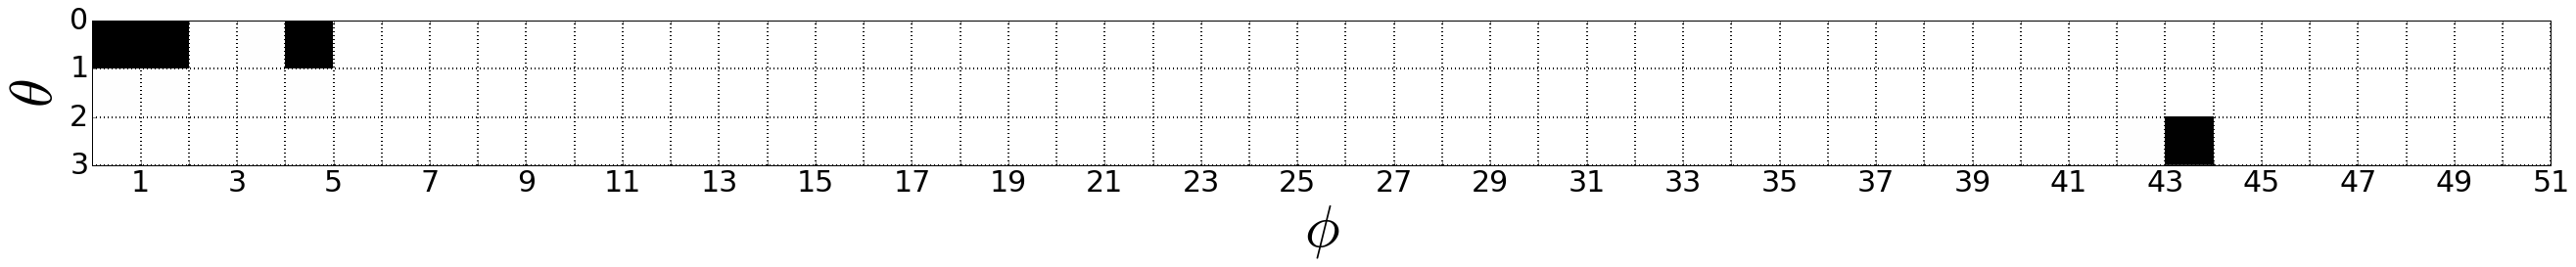

In [41]:
plt.figure(figsize=(45,500))
plt.imshow(image[j,:,:,2],cmap='Greys', interpolation='none')
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, 51, 1))
ax.set_yticks(np.arange(-0.5, 3, 1));
plt.grid(color='black', linewidth=2)
ax.set_xticklabels(np.arange(0, 52, 1), fontsize=30)
ax.set_yticklabels(np.arange(0, 4, 1), fontsize=30)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.grid(color='black', linewidth=2, which='minor')
plt.xlabel(r'$\phi$', fontsize=60)
plt.ylabel(r'$\theta$', fontsize=60)

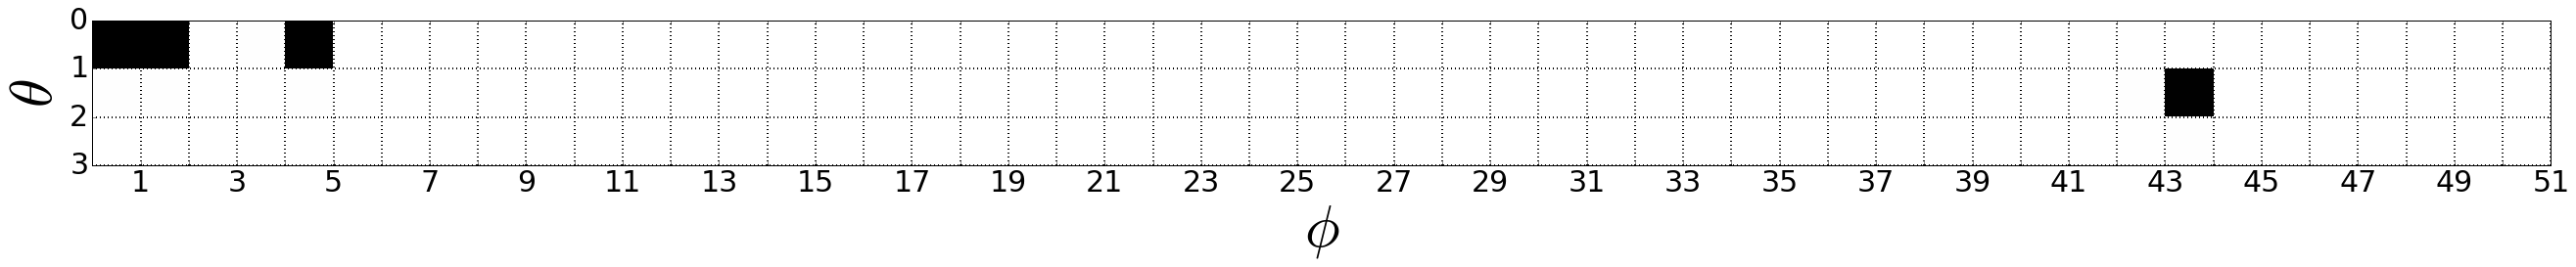

In [42]:
plt.figure(figsize=(45,500))
plt.imshow(image[j,:,:,3],cmap='Greys', interpolation='none')
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, 51, 1))
ax.set_yticks(np.arange(-0.5, 3, 1));
plt.grid(color='black', linewidth=2)
ax.set_xticklabels(np.arange(0, 52, 1), fontsize=30)
ax.set_yticklabels(np.arange(0, 4, 1), fontsize=30)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.grid(color='black', linewidth=2, which='minor')
plt.xlabel(r'$\phi$', fontsize=60)
plt.ylabel(r'$\theta$', fontsize=60)

In [ ]:
# start

In [43]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(3, 51, 4)))
model.add(layers.Conv2D(64, (1, 3), activation='relu'))
model.add(layers.Conv2D(64, (1, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 1, 49, 32)         1184      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 47, 64)         6208      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 45, 64)         12352     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                184384    
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
__________

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train1, X_test, y_train1, y_test = train_test_split(image, y_train, test_size=0.33, random_state=42)

In [48]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(X_train1, y_train1, epochs=10, batch_size=512, validation_split=0.2)

Train on 160800 samples, validate on 40200 samples
Epoch 1/10
160800/160800 [==============================] - 31s 190us/step - loss: 0.0266 - mean_absolute_error: 0.1033 - val_loss: 0.0296 - val_mean_absolute_error: 0.1107
Epoch 2/10
160800/160800 [==============================] - 30s 189us/step - loss: 0.0259 - mean_absolute_error: 0.1012 - val_loss: 0.0286 - val_mean_absolute_error: 0.1062
Epoch 3/10
160800/160800 [==============================] - 30s 187us/step - loss: 0.0255 - mean_absolute_error: 0.0999 - val_loss: 0.0269 - val_mean_absolute_error: 0.1040
Epoch 4/10
160800/160800 [==============================] - 31s 192us/step - loss: 0.0252 - mean_absolute_error: 0.0991 - val_loss: 0.0279 - val_mean_absolute_error: 0.1097
Epoch 5/10
160800/160800 [==============================] - 30s 190us/step - loss: 0.0248 - mean_absolute_error: 0.0982 - val_loss: 0.0273 - val_mean_absolute_error: 0.1051
Epoch 6/10
160800/160800 [==============================] - 30s 189us/step - loss: 0

In [49]:
y_pred = model.predict(X_test)

In [50]:
err_arr = np.zeros((y_test.shape[0],))
for i in range(y_test.shape[0]):
    err_arr[i] = (y_pred[i] - y_test[i])/y_test[i]

In [51]:
def ind_ptrange(y, ptmin = 24, ptmax = 25):
    ooptmin = 1./ptmax
    ooptmax = 1./ptmin
    return np.where((y>ooptmin) & (y<ooptmax))[0]

In [52]:
import matplotlib.pyplot as plt

In [53]:
from scipy.optimize import curve_fit

def gaus(x,a,mu,sig):
    return a*np.exp(-((x-mu)**2)/(2*sig**2))

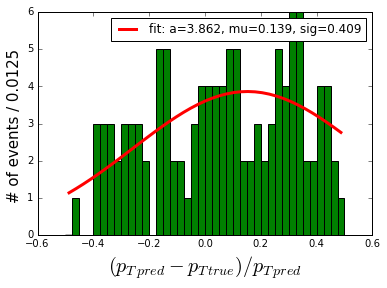

In [63]:
pt1 = 20
ind2 = ind_ptrange(y_test, ptmin = pt1-0.5, ptmax = pt1+0.5)
y_test2 = y_test[ind2]
y_pred2 = y_pred[ind2]
err_arr2 = np.zeros((y_test2.shape[0],))
for i in range(y_test2.shape[0]):
    err_arr2[i] = (y_pred2[i] - y_test2[i])/y_test2[i]
nbin = 40
bin2 = np.linspace(-0.5,0.5,nbin)
h1,h2 = np.histogram(err_arr2,bins=bin2)
popt, pcov = curve_fit(gaus,h2[:-1],h1)
plt.hist(err_arr2, nbin,range=(-0.5,0.5),facecolor='g')
plt.plot((h2[1:]+h2[:-1])/2.,gaus(h2[:-1],*popt), linewidth=3, color='red',label='fit: a=%5.3f, mu=%5.3f, sig=%5.3f'%tuple(popt))
plt.legend()
#plt.text(-0.55, 1200, '$p_T$ @ {0}GeV'.format(pt1), fontsize=15)
#plt.text(0.55,1200,'Work in Progress', fontsize=15,horizontalalignment='right',verticalalignment='bottom')
plt.ylabel('# of events / 0.0125 ', fontsize=15)
plt.xlabel(r'$({p_T}_{pred} - {p_T}_{true})/{p_T}_{pred}$', fontsize=20)

In [ ]:
popt

In [ ]:
from pylab import *
from numpy import loadtxt
from scipy.optimize import leastsq

fitfunc  = lambda p, x: p[0]*exp(-0.5*((x-p[1])/p[2])**2)+p[3]
errfunc  = lambda p, x, y: (y - fitfunc(p, x))

filename = "gaussdata.csv"
data     = loadtxt(filename,skiprows=1,delimiter=',')
xdata    = data[:,0]
ydata    = data[:,1]

init  = [1.0, 0.5, 0.5, 0.5]

out   = leastsq( errfunc, init, args=(xdata, ydata))
c = out[0]

print "A exp[-0.5((x-mu)/sigma)^2] + k "
print "Parent Coefficients:"
print "1.000, 0.200, 0.300, 0.625"
print "Fit Coefficients:"
print c[0],c[1],abs(c[2]),c[3]

plot(xdata, fitfunc(c, xdata))
plot(xdata, ydata)

title(r'$A = %.3f\  \mu = %.3f\  \sigma = %.3f\ k = %.3f $' %(c[0],c[1],abs(c[2]),c[3]));

show()

In [ ]:
np.mean(err_arr)

In [ ]:
for i in range(0,100):
    print(1./y_train[i],1./y_pred[i])

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
j=ind1[0]
print(j)
img_a = np.full((36,672),-64)
egxtrain = x_train_cnn[j,:,:]
egxtrain0 = x_train_cnn[j,:,0]
egxtrain1 = x_train_cnn[j,:,1]
egxtrain2 = x_train_cnn[j,:,2]

i=0
phimin = np.min(egxtrain0[np.nonzero(egxtrain0)])
phimax = np.max(egxtrain0[np.nonzero(egxtrain0)])
thetamin = np.min(egxtrain1[np.nonzero(egxtrain1)])
thetamax = np.max(egxtrain1[np.nonzero(egxtrain1)])
#print(phimin,phimax)
#print(thetamin,thetamax)
phicen = int(phimax-phimin)
thetacen = int(thetamax-thetamin)
phi_offset = int((672-phimax+phimin)/2.)
theta_offset = int((36-thetamax+thetamin)/2.)
zmax = 0
for x,y,z in egxtrain:
    i+=1

    
    #print(x,y,z)
    if x != 0:
        print(i)
        #print(abs(zmax))
        if abs(zmax) < abs(z):
            print(True)
            zmax = z
        print(int(y)-int(thetamin),int(x)-int(phimin),zmax)
        img_a[int(y)-int(thetamin)+theta_offset,int(x)-int(phimin)+phi_offset] = int(zmax)
print(100./(y_train[j]))
plt.figure(figsize=(45,500))
plt.imshow(img_a,cmap='Greys', interpolation='none')
#plt.set_yticks([0,10,20,30])
ax = plt.gca()
ax.set_yticks([0,10,20,30])
plt.tick_params(axis="x", labelsize=40)
plt.tick_params(axis="y", labelsize=40)
plt.xlabel(r'$\phi$', fontsize=60)
plt.ylabel(r'$\theta$', fontsize=60)
#plt.xlim(0,100)
#plt.ylim(0,15)

In [ ]:
3*68

In [ ]:
variables_m[0]

In [ ]:
x_data = variables_m.copy()

In [ ]:
l=6

x_data[0,0+12*l:12+12*l]

In [ ]:
x_data[:,0:36] -= np.nanmean(x_data[:,0:36])

In [ ]:
x_data[:,0:36] /= np.nanstd(x_data[:,0:36])

In [ ]:
x_data[13]

In [ ]:
np.nan_to_num(x_data,copy=False)

In [ ]:
x_data[0]

In [ ]:
x_data.shape